In [1]:
import pandas as pd
import numpy as np
import dask
import dask.dataframe as dd

In [2]:
path = '/home/ubuntu/scratch/xinrui/intermediate-result/all-data/sig-contributions-all-data/'

In [3]:
df = pd.read_parquet(path)

In [4]:
x = df.groupby('contributor.username').agg({'added_len':'count'}).rename(columns={'added_len':'num_sig_contributions'})

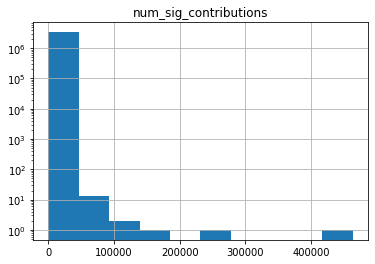

In [5]:
import matplotlib.pyplot as plt
x.hist()
plt.yscale('log')

In [6]:
test = [100000,10000,1000,500,400,300,200,100,10,1]  

In [7]:
for i in test:
    tmp = x[x['num_sig_contributions']>=i]
    print('There are {0} editors with a significant contributions greater than or equal to {1}'.format(len(tmp),i))

There are 4 editors with a significant contributions greater than or equal to 100000
There are 302 editors with a significant contributions greater than or equal to 10000
There are 6739 editors with a significant contributions greater than or equal to 1000
There are 12740 editors with a significant contributions greater than or equal to 500
There are 15415 editors with a significant contributions greater than or equal to 400
There are 19457 editors with a significant contributions greater than or equal to 300
There are 26610 editors with a significant contributions greater than or equal to 200
There are 44552 editors with a significant contributions greater than or equal to 100
There are 302222 editors with a significant contributions greater than or equal to 10
There are 3367173 editors with a significant contributions greater than or equal to 1


In [8]:
res = x[x['num_sig_contributions'] >= 500]

In [10]:
# filter out bots
def is_bot(text):
    text = text.split(' ')
    for item in text:
        if item.lower().endswith('bot'):
            return True
    return False

In [18]:
res = res[res.index.map(is_bot) == False]

In [19]:
res.to_parquet('../../intermediate-result/all-data/editors_sig_contribution_above_500')